In [19]:
!pip install pydataset

     -------------------------------------- 15.9/15.9 MB 665.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=dc6748f03abae72957b6d720b648b68a93467f30f4fee4496067b4f953f52936
  Stored in directory: c:\users\gopiv\appdata\local\pip\cache\wheels\6b\86\a7\f71cb84c7bff804d83e293615a20c0531234397b796aee2645
Successfully built pydataset


In [1]:
from pydataset import data
import pandas as pd

In [2]:
data_set=data('DoctorAUS')
data_set


,sex,age,income,insurance,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
1,1,0.19,0.55,levyplus,1,4,1,np,1,0,0,0,1,1,0
2,1,0.19,0.45,levyplus,1,2,1,np,1,0,0,0,2,1,1
3,0,0.19,0.90,medlevy,3,0,0,np,1,0,1,4,2,1,1
4,0,0.19,0.15,medlevy,1,0,0,np,1,0,0,0,0,0,0
5,0,0.19,0.45,medlevy,2,5,1,la,1,0,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,1,0.22,0.55,medlevy,0,0,0,np,0,0,0,0,0,0,0
5187,0,0.27,1.30,medlevy,0,0,1,np,0,0,0,0,3,0,3
5188,1,0.37,0.25,freerepa,1,0,1,np,0,0,0,0,0,0,0
5189,1,0.52,0.65,medlevy,0,0,0,np,0,0,0,0,0,0,0


In [3]:
df=pd.DataFrame(data_set)
df

,sex,age,income,insurance,illness,actdays,hscore,chcond,doctorco,nondocco,hospadmi,hospdays,medecine,prescrib,nonpresc
1,1,0.19,0.55,levyplus,1,4,1,np,1,0,0,0,1,1,0
2,1,0.19,0.45,levyplus,1,2,1,np,1,0,0,0,2,1,1
3,0,0.19,0.90,medlevy,3,0,0,np,1,0,1,4,2,1,1
4,0,0.19,0.15,medlevy,1,0,0,np,1,0,0,0,0,0,0
5,0,0.19,0.45,medlevy,2,5,1,la,1,0,0,0,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5186,1,0.22,0.55,medlevy,0,0,0,np,0,0,0,0,0,0,0
5187,0,0.27,1.30,medlevy,0,0,1,np,0,0,0,0,3,0,3
5188,1,0.37,0.25,freerepa,1,0,1,np,0,0,0,0,0,0,0
5189,1,0.52,0.65,medlevy,0,0,0,np,0,0,0,0,0,0,0


In [4]:
X=df[['age','income','sex','illness','actdays','hscore','doctorco','nondocco','hospadmi','hospdays','medecine','prescrib']].values
y=df['insurance'].values

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [9]:
y_pred=gnb.predict(X_test)

In [10]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     freepor       0.47      0.14      0.22        56
    freerepa       0.63      0.50      0.56       274
    levyplus       0.49      0.32      0.38       556
     medlevy       0.48      0.81      0.60       412

    accuracy                           0.51      1298
   macro avg       0.52      0.44      0.44      1298
weighted avg       0.51      0.51      0.48      1298



In [11]:
print(accuracy_score(y_test,y_pred)*100)

50.53929121725732


# second example on iris dataset

In [12]:
import seaborn as sns
import numpy as np

In [13]:
data=sns.load_dataset('iris')
iris_data=pd.DataFrame(data)
iris_data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
X=iris_data.drop('species',axis=1).values
y=iris_data['species'].values

In [15]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
X=sc.fit_transform(X)


In [16]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [18]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

In [19]:
gnb.fit(X_train,y_train)

GaussianNB()

In [20]:
y_pred=gnb.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']]


In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      1.00      1.00        16
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [22]:
print(accuracy_score(y_test,y_pred)*100)

100.0


In [23]:
print(confusion_matrix(y_test,y_pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


# Navie bayes on text classification example

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [26]:
#defining all categories
categories=['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
#training the data on these categories
train=fetch_20newsgroups(subset='train',categories=categories)
#testing the data for these categories
test=fetch_20newsgroups(subset='test',categories=categories)
#printing the training data
print(train.data[5])
#printing the testing data
#print(test.data[5])
print(len(train.data))
print(len(test.data))

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
#creatin model based on multinomila naive bayes
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
model.fit(train.data,train.target)
pred=model.predict(test.data)

Text(50.7222222222222, 0.5, 'predict label')

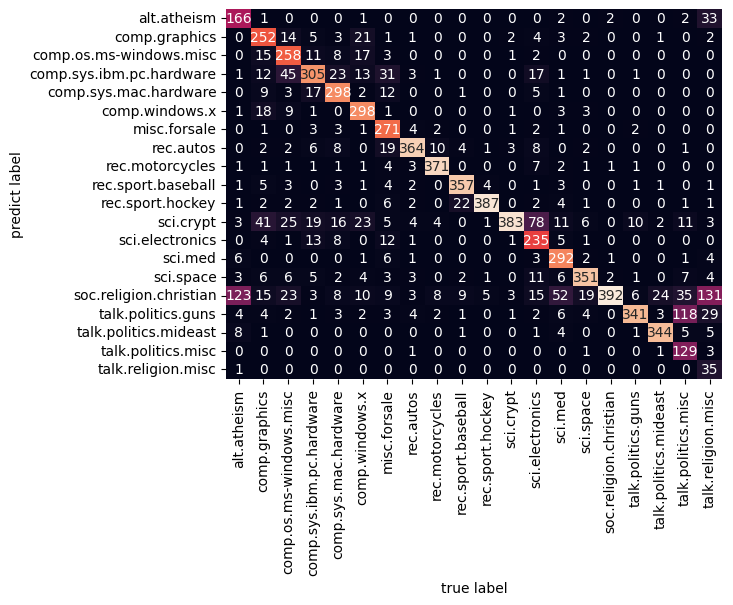

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
mat=confusion_matrix(test.target,pred)
sns.heatmap(mat.T,annot=True,fmt='d',cbar=False
                    ,yticklabels=train.target_names,xticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predict label')

In [29]:
accuracy_score(test.target,pred)*100

77.38980350504514

In [30]:
#pedicting category on new data based on training model
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [31]:
predict_category('satellites are sending to space')

'sci.space'

In [32]:
predict_category('Tata is cheaper than BMW')

'rec.motorcycles'

In [33]:
predict_category('Audi is better than BMW')

'rec.autos'

In [34]:
predict_category('president of india')

'talk.politics.misc'

In [35]:
predict_category('jesus christ is a god')

'soc.religion.christian'